<a href="https://colab.research.google.com/github/dilaraozcerit/Machine-Learning/blob/main/ML_13_(Random_Forest_Regression)(TR)_29_Jan_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest - Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


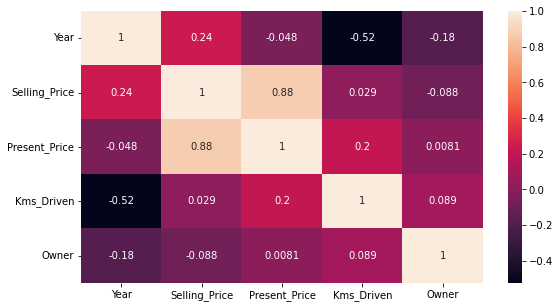

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [ ]:
df["vehicle_age"]=2021-df.Year

In [ ]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [ ]:
df.drop(columns=["Year"], inplace=True)

In [ ]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,3.350,5.590,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.750,9.540,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.250,9.850,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.850,4.150,5200,Petrol,Dealer,Manual,0,10
4,swift,4.600,6.870,42450,Diesel,Dealer,Manual,0,7


## Train test split

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [ ]:
cat = X.select_dtypes("object").columns
cat

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
X[cat].head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [ ]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,90.000,5.590,27000,2.000,0.000,1.000,0,7
1,93.000,9.540,43000,1.000,0.000,1.000,0,8
2,68.000,9.850,6900,2.000,0.000,1.000,0,4
3,96.000,4.150,5200,2.000,0.000,1.000,0,10
4,92.000,6.870,42450,1.000,0.000,1.000,0,7


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling for Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
DT_model = DecisionTreeRegressor(random_state=101)

In [ ]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.952
mae,0.000,0.603
mse,0.000,1.283
rmse,0.000,1.133


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]
# cross val sonrası anlıyoruz ki skorlarımız tutarlı

test_r2                             0.891
test_neg_mean_absolute_error       -0.787
test_neg_mean_squared_error        -2.748
test_neg_root_mean_squared_error   -1.457
dtype: float64

## Feature Importances

In [ ]:
DT_model.feature_importances_

array([9.18365194e-03, 8.94444598e-01, 4.78756069e-03, 7.75109283e-04,
       2.82862694e-04, 7.56380773e-04, 3.41291861e-05, 8.97357073e-02])

In [ ]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.000
Seller_Type,0.000
Transmission,0.001
Fuel_Type,0.001
Kms_Driven,0.005
Car_Name,0.009
vehicle_age,0.090
Present_Price,0.894


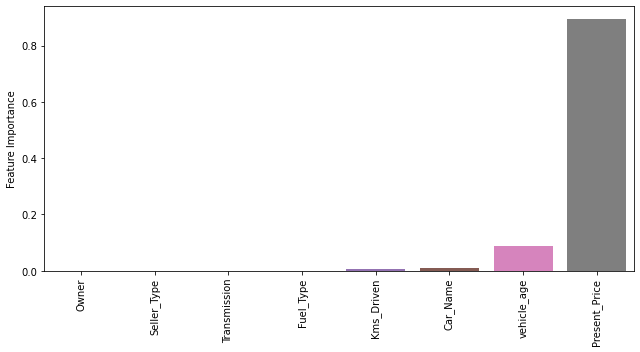

In [ ]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Modeling for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train,y_train)
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.986,0.973
mae,0.235,0.513
mse,0.348,0.725
rmse,0.590,0.851


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.862
test_neg_mean_absolute_error       -0.736
test_neg_mean_squared_error        -3.393
test_neg_root_mean_squared_error   -1.566
dtype: float64

## Feature Importances

In [ ]:
rf_model.feature_importances_

array([2.34156850e-02, 8.66318271e-01, 1.73148579e-02, 2.14160300e-03,
       2.08393371e-03, 2.67174857e-03, 6.16411815e-05, 8.59922594e-02])

In [ ]:
df_f_i = pd.DataFrame(index=X.columns, data = rf_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.000
Seller_Type,0.002
Fuel_Type,0.002
Transmission,0.003
Kms_Driven,0.017
Car_Name,0.023
vehicle_age,0.086
Present_Price,0.866


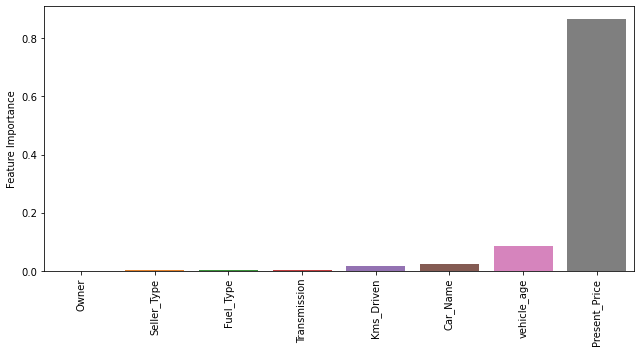

In [ ]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Visualizing trees

In [ ]:
from sklearn.tree import plot_tree

def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[0],filled=True, feature_names=X.columns, fontsize=10);

In [ ]:
pruned_tree = RandomForestRegressor(n_estimators=250, max_depth=4, random_state=101)
pruned_tree.fit(X_train,y_train)
# grid searchle parametrelerimizi değiştirmemiz gerekebilir. max_features='auto', bunu değiştrimek gerekebilir.

RandomForestRegressor(max_depth=4, n_estimators=250, random_state=101)



      train  test
R2    0.963 0.941
mae   0.572 0.750
mse   0.953 1.577
rmse  0.976 1.256




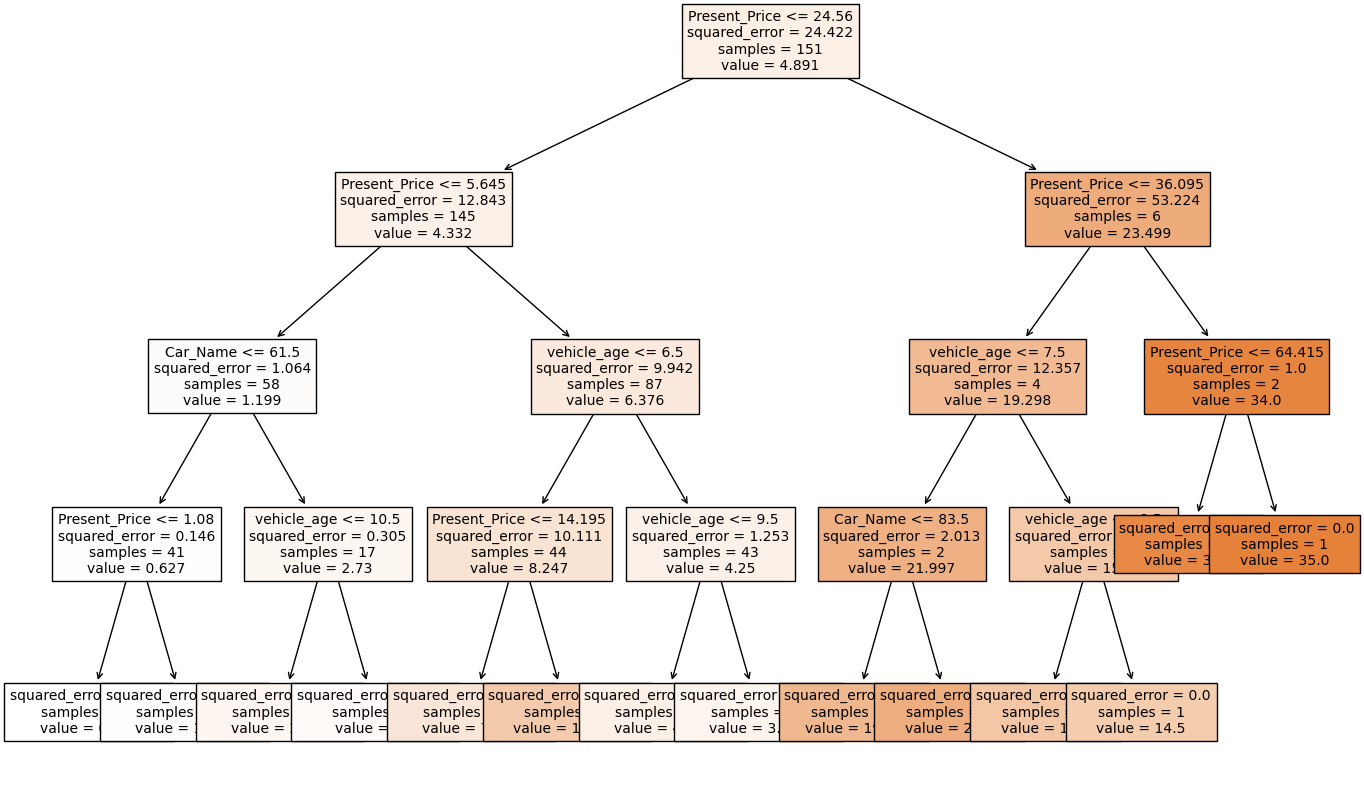

In [ ]:
report_model(pruned_tree)

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = RandomForestRegressor(random_state=101)

In [ ]:
param_grid = {"n_estimators":[200, 500],
              "max_depth": [None, 4, 5, 6, 7,8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', len(df.columns)/3, 2, 4]}

In [ ]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 100.33333333333333, 2, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_model.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=200, random_state=101)

In [ ]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.683,0.051,0.040,0.011,None,auto,1,2,200,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.606,-0.718,-2.085,-0.712,-1.731,-0.791,-2.741,-1.977,-0.635,-3.309,-1.530,0.933,31
1,1.520,0.071,0.081,0.007,None,auto,1,2,500,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.603,-0.728,-1.920,-0.721,-1.690,-0.831,-2.715,-1.779,-0.684,-3.148,-1.482,0.872,11
2,0.575,0.023,0.034,0.003,None,auto,1,3,200,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.617,-0.721,-2.131,-0.708,-1.663,-0.830,-2.654,-1.997,-0.653,-3.318,-1.529,0.921,29
3,1.430,0.028,0.083,0.011,None,auto,1,3,500,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.612,-0.733,-2.092,-0.702,-1.665,-0.863,-2.672,-1.776,-0.713,-3.192,-1.502,0.879,18
4,0.580,0.022,0.034,0.006,None,auto,1,5,200,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.589,-0.727,-2.941,-0.755,-1.287,-0.888,-2.838,-2.304,-0.675,-3.052,-1.606,0.995,153
5,1.452,0.033,0.088,0.009,None,auto,1,5,500,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.583,-0.724,-2.818,-0.744,-1.334,-0.892,-2.778,-1.990,-0.715,-2.996,-1.557,0.940,53
6,0.577,0.014,0.035,0.004,None,auto,1,6,200,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.590,-0.718,-3.030,-0.808,-1.102,-0.925,-2.825,-2.281,-0.712,-3.011,-1.600,0.996,145
7,1.463,0.078,0.102,0.036,None,auto,1,6,500,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.590,-0.725,-2.924,-0.798,-1.100,-0.935,-2.794,-2.052,-0.751,-2.972,-1.564,0.954,60
8,0.659,0.092,0.049,0.013,None,auto,2,2,200,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.628,-0.696,-2.742,-0.803,-1.542,-0.893,-2.480,-2.207,-0.650,-3.581,-1.622,1.008,220
9,2.081,0.102,0.132,0.032,None,auto,2,2,500,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.612,-0.716,-2.569,-0.796,-1.507,-0.889,-2.419,-2.076,-0.671,-3.451,-1.571,0.951,73


In [ ]:
grid_model.best_index_

96

In [ ]:
grid_model.best_score_

-1.454127512097886

In [ ]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.983,0.959
mae,0.252,0.535
mse,0.430,1.097
rmse,0.656,1.047


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

model = RandomForestRegressor(random_state=101, max_depth = None,
             max_features= 4,
             min_samples_leaf = 1,
             min_samples_split= 2,
             n_estimators= 200)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.894
test_neg_mean_absolute_error       -0.719
test_neg_mean_squared_error        -3.129
test_neg_root_mean_squared_error   -1.454
dtype: float64

In [ ]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [ ]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
132,0.750,0.808,-0.058
138,0.600,0.606,-0.006
193,0.200,0.308,-0.108
106,1.350,1.673,-0.323
67,9.250,10.684,-1.434
93,23.000,21.900,1.100
115,1.110,1.144,-0.034
171,0.400,0.447,-0.047
176,0.350,0.473,-0.123
117,1.100,1.333,-0.233


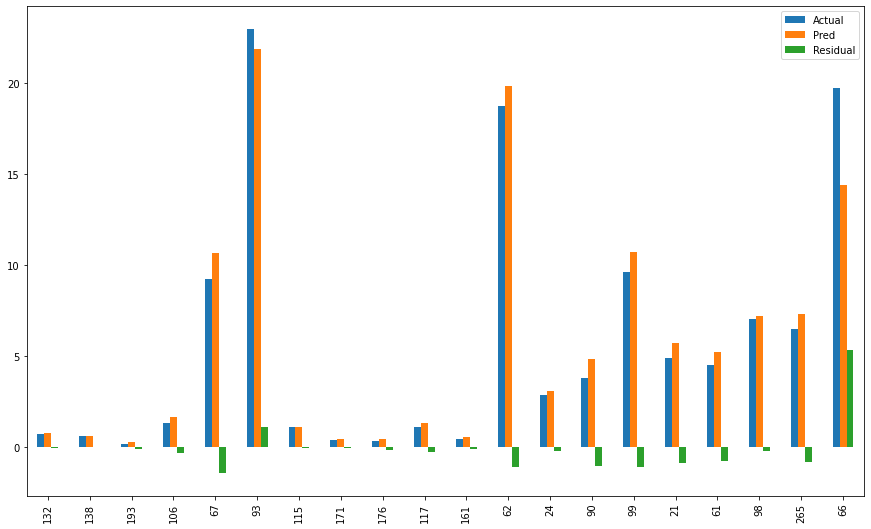

In [ ]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()